**Aim of this project is to detect fraudulent transactions in financial systems.**

**Dataset Information:-**



*   Dataset: Transactions made by European cardholders in September 2013.
*   Duration: Two days, with 492 frauds out of 284,807 transactions.
*   Class Imbalance: Fraudulent transactions (positive class) account for 0.172% of all transactions.


**Features:**

*   Numerical input variables resulting from PCA transformation.
*  'Time': Seconds elapsed between each transaction and the first transaction.
*  'Amount': Transaction amount, suitable for cost-sensitive learning.

**Target:**
*  'Class': Response variable, 1 for fraud, 0 otherwise.




















As dataset is highly imbalanced only accuracy can't be the factor for the good model we have to check its Recall, Precision and f1-score

# **Below is the implementation of Credit-Card Fraud Detection System:**

In [ ]:
# imports essential Python libraries for data analysis and visualization.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Select and upload the creditcard.csv file
from google.colab import files
uploaded = files.upload()

In [ ]:
#This code reads the uploaded creditcard.csv file into a Pandas DataFrame called df.
import pandas as pd
df = pd.read_csv('creditcard (2).csv')


In [ ]:
## Prints the first five rows to give a quick look at the dataset's structure and contents.
df.head()

In [ ]:
# Display a concise summary of the DataFrame, including column names, data types, non-null counts, and memory usage
df.info()

In [ ]:
# Print the shape of the dataset (number of rows and columns)
print('Shape Of The Dataset', df.shape)

# Print the unique class categories in the 'Class' column
print('Class Categories', df['Class'].unique())

# Print the number of records with the class value 0 in the 'Class' column
print('Number Of Records With The Class Value 0: ', (df.Class == 0).sum())

# Print the number of records with the class value 1 in the 'Class' column
print('Number Of Records With The Class Value 1: ', (df.Class == 1).sum())

In [ ]:
#Shows the proportion of each class as parts of a whole.
counts = df['Class'].value_counts()
labels = [f'{cls} ({count})' for cls, count in zip(counts.index, counts)]

# Plot pie chart
counts.plot.pie(labels=labels, autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Class Distribution')
plt.show()

In [ ]:
#Compute the correlation of all features with the 'Class' column (fraud label), and display the first 30 correlations
x = df.corr()['Class'][:30]
x

In [ ]:
# Generate a bar plot to show how each feature correlates with the target variable 'Class'.
x.plot.bar(figsize=(16, 9), title="Correlation Of Features With Target Variable", grid=True)

In [ ]:
# The figure size is set to 16x9 inches for better readability
plt.figure(figsize=(16, 9))

# Create a heatmap to visualize the correlation matrix of the dataset
sns.heatmap(df.corr())

In [ ]:
# Calculate the correlation coefficients between 'Class' and all columns
y = df.corr()['Class']

# Create a copy of the original DataFrame to avoid modifying it directly
df2 = df.copy()

# Drop features from df2 that have an absolute correlation with 'Class' less than 0.13 (weak correlation)
for i in df.columns:
    if abs(y[i]) < 0.13:
        df2.drop(columns=[i], inplace=True)

# Display the first few rows of the DataFrame
df2.head()

In [ ]:
# The figure size is set to 16x9 inches for better readability
plt.figure(figsize=(16, 9))

# Generate a heatmap to visualize the correlation matrix of the DataFrame
sns.heatmap(df2.corr(), annot=True)

The heatmap shows how each feature in df2 correlates with the Class column, which indicates fraud (1) or non-fraud (0).

In the heatmap:


*  Values closer to 1 or -1 indicate a strong positive or negative correlation with Class.
* Features that remain in df2 are the most relevant ones for identifying fraud, based on correlation.






In [ ]:
# Get correlation of first 9 features with 'Class'
x = df2.corr()['Class'][:9]

# Plot bar chart of these correlations
x.plot.bar(figsize=(16, 9), title="Top Correlated Features With The Target Variable", grid=True)

# **Handling Data Imbalance**

The dataset is highly imbalanced (majority class 0), which can mislead models. Oversampling may cause overfitting due to synthetic data. Downsampling is preferred—it balances classes by reducing majority samples, helping models learn both classes better. Train on balanced data, test on real-world (imbalanced) data for reliable evaluation.

**Confusion matrix for no sampling:-**


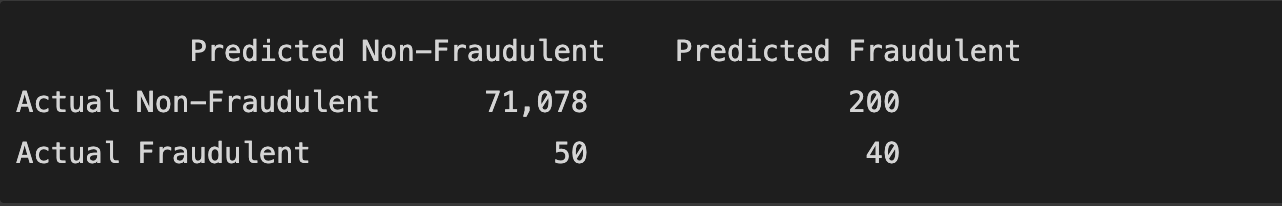


**Confusion Matrix(Oversampling (SMOTE)):**


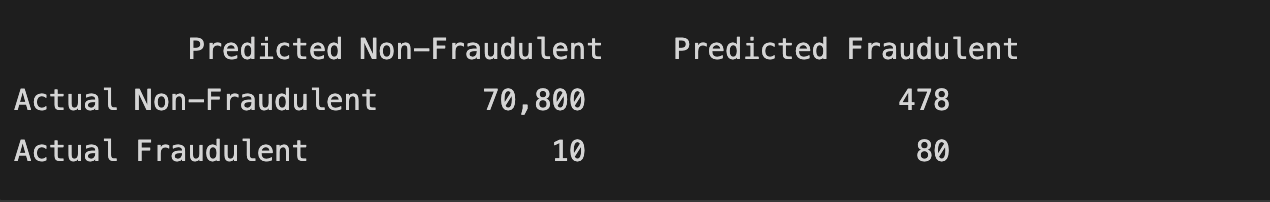


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Split the dataset into input features and target variable
X = df2.drop(columns='Class')
y = df2['Class']

# Create an instance of RandomUnderSampler with a fixed random state for reproducibility
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling to balance the class distribution
X_downsampled, y_downsampled = undersampler.fit_resample(X, y)

# Combine the resampled features and target into a new DataFrame
downsampled_df = pd.DataFrame(X_downsampled, columns=X.columns)
downsampled_df['Class'] = y_downsampled

# Display the first few rows of the downsampled dataset
downsampled_df.head()


In [ ]:
print("Shape of the downsampled DataFrame:", downsampled_df.shape)

In [ ]:
# Generate a count plot to visualize the distribution of classes in the 'Class' column of the downsampled DataFrame downsampled_df
sns.countplot(x='Class', data=downsampled_df)

In [ ]:
# Plotting using seaborn scatterplot
# This helps you visualize how well-separated the classes are in this 2D projection.
sns.scatterplot(x='V11', y='V17', hue='Class', data=df2)


# **Outliers**

**Outliers are data points that differ significantly from the rest of the data in a dataset. They are unusually high or low values that deviate from the overall pattern or trend of the data.**

In [ ]:
import warnings

# Suppress all warning messages
warnings.filterwarnings('ignore')

# Generate pairwise scatter plots for all features, colored by 'Class'
sns.pairplot(data=downsampled_df, hue='Class')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix

# Separate features and target from the original dataset
X = df2.drop(columns='Class')
y = df2['Class']

# Step 1: Stratified train-test split to maintain class balance in both sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 2: Combine training features and labels for downsampling
train_data = pd.concat([X_train_orig, y_train_orig], axis=1)

# Separate majority and minority classes
majority_class = train_data[train_data['Class'] == 0]
minority_class = train_data[train_data['Class'] == 1]

# Downsample the majority class to match the minority class count
majority_downsampled = resample(
    majority_class,
    replace=False,                      # No replacement
    n_samples=len(minority_class),     # Match minority count
    random_state=42                    # For reproducibility
)

# Step 3: Combine the balanced classes
downsampled_train_data = pd.concat([majority_downsampled, minority_class])

# Shuffle the downsampled training data (optional but recommended)
downsampled_train_data = downsampled_train_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and labels for training
X_train_downsampled = downsampled_train_data.drop(columns='Class')
y_train_downsampled = downsampled_train_data['Class']

In [ ]:
#LazyPredict is a super handy Python library that
#lets you quickly compare the performance of many machine learning models without writing a ton of code for each one.
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

# Step 4: Initialize LazyClassifier with a fixed random state
lazy_clf = LazyClassifier(random_state=42, verbose=0)

# Train models on the downsampled training data and evaluate on the original test set
models_summary, predictions = lazy_clf.fit(
    X_train_downsampled, X_test_orig, y_train_downsampled, y_test_orig
)

# Display model performance metrics
print("Model Performance Summary:")
models_summary


We use BernoulliNB, NuSVC, and NearestCentroid to compare different algorithm types on fraud detection. These models are simple, fast, and work well with high-dimensional or imbalanced data, making them ideal for benchmarking performance on the downsampled dataset.

1.⁠ ⁠✅ Bernoulli Naive Bayes
F1 Score: 1.00

Balanced Accuracy: 0.93

Time Taken: 0.17s


2.⁠ ⁠✅ NuSVC (Support Vector Machine variant)
F1 Score: 1.00

Balanced Accuracy: 0.92

Time Taken: 5.11s


3.⁠ ⁠✅ NearestCentroid
F1 Score: 1.00

Balanced Accuracy: 0.90

Time Taken: 0.14s



In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import NuSVC
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import f1_score

# Define and initialize the models
models = {
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Nu-Support Vector Classifier": NuSVC(probability=True),
    "Nearest Centroid": NearestCentroid()
}

# Dictionary to store F1 scores
f1_scores = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_downsampled, y_train_downsampled)       # Train the model
    y_pred = model.predict(X_test_orig)                       # Make predictions on test set
    f1 = f1_score(y_test_orig, y_pred, pos_label=1)           # Compute F1 score for the positive class
    f1_scores[model_name] = f1

# Display results
print("F1 Scores (for Class = 1):")
for model_name, score in f1_scores.items():
    print(f"{model_name}: {score:.4f}")


From the F1 scores as output above, our winner is NearestCentroid.
The Nearest Centroid Classifier is a simple and fast classification algorithm. It works by calculating the mean (centroid) of each class in the training data, and then assigns new samples to the class whose centroid is closest (Euclidean distance).

In [ ]:
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize the NearestCentroid model
FRAUDFIGHTER = NearestCentroid()

# Fit the model on the downsampled training data
FRAUDFIGHTER.fit(X_train_downsampled, y_train_downsampled)

# Predict on the original test data
y_pred = FRAUDFIGHTER.predict(X_test_orig)

# Generate classification report
report = classification_report(y_test_orig, y_pred)
print("Classification Report:\n", report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_orig, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Permutation Importance

Permutation importance measures the change in a model’s performance when a single feature's values are randomly shuffled.
The idea is simple:

If shuffling a feature drops performance significantly, it means the model relied heavily on that feature and hence we cannot drop that feature.

**Importance=Baseline score−Shuffled score**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Compute permutation importance
result = permutation_importance(model, X_test_orig, y_test_orig, n_repeats=10, random_state=42, scoring='f1')

# Get mean and standard deviation of importance values
importance = result.importances_mean
std = result.importances_std

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': X_test_orig.columns,
    'Importance': importance,
    'Std Dev': std
}).sort_values(by='Importance', ascending=False)

# Print the DataFrame
print("Feature Importances:\n", importance_df)

# Plot feature importances without error bars
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.xlabel('Mean Importance')
plt.ylabel('Feature')
plt.title('Permutation Importance of Features')
plt.show()

# **GENETIC ALGORITHM**
We are now further implementing Genetic Algorithm in the model to improve the accuracy, recall, f1 score etc.


In [ ]:
#Distributed Evolutionary Algorithms in Python. It’s a powerful and flexible library designed for evolutionary computing, including:Genetic algorithms (GAs)
!pip install deap

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
from deap import base, creator, tools, algorithms
import random
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# -------------------------------
# Use cleaned and balanced DataFrame
X = downsampled_df.drop(columns=['Class']).values  # or use df2 (if not balanced)
y = downsampled_df['Class'].values
feature_count = X.shape[1]
# -------------------------------

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Genetic Algorithm parameters
POP_SIZE = 20
NGEN = 5
CX_PB = 0.5
MUT_PB = 0.2

In [ ]:
# GA setup for multi-objective (accuracy + F1)
creator.create("FitnessMulti", base.Fitness, weights=(1.0, 1.0))
creator.create("Individual", list, fitness=creator.FitnessMulti)
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=feature_count)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
# Fitness function
def evaluate(individual):
    selected_features = [i for i in range(len(individual)) if individual[i] == 1]
    if len(selected_features) == 0:
        return (0.0, 0.0)

    try:
        X_train_sel = X_train[:, selected_features]
        X_test_sel = X_test[:, selected_features]

        model = Sequential([
            Dense(64, activation='relu', input_shape=(len(selected_features),)),
            Dropout(0.2),
            Dense(32, activation='relu'),
            Dropout(0.2),
            Dense(16, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train_sel, y_train, epochs=20, batch_size=32, verbose=0)

        y_pred = (model.predict(X_test_sel) > 0.5).astype("int32")
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        return (acc, f1)
    except Exception as e:
        print(f"Error during evaluation: {e}")
        return (0.0, 0.0)

In [ ]:
#Register operators
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selNSGA2)
toolbox.register("evaluate", evaluate)

In [ ]:
# Run GA
population = toolbox.population(n=POP_SIZE)

for gen in range(NGEN):
    print(f"\nGeneration {gen + 1}")
    offspring = algorithms.varAnd(population, toolbox, cxpb=CX_PB, mutpb=MUT_PB)
    fits = list(map(toolbox.evaluate, offspring))

    for ind, fit in zip(offspring, fits):
        if not isinstance(fit, tuple) or len(fit) != 2:
            print(f"Invalid fitness: {fit}, assigning (0.0, 0.0)")
            ind.fitness.values = (0.0, 0.0)
        else:
            ind.fitness.values = fit

    # Filter valid individuals before selection
    valid_individuals = [ind for ind in offspring + population if hasattr(ind.fitness, 'values') and isinstance(ind.fitness.values, tuple) and len(ind.fitness.values) == 2]

    # Ensure population size is preserved
    while len(valid_individuals) < POP_SIZE:
        dummy = toolbox.individual()
        dummy.fitness.values = (0.0, 0.0)
        valid_individuals.append(dummy)

    population[:] = toolbox.select(valid_individuals, k=POP_SIZE)

In [ ]:
# Get best individual based on combined score (acc + f1)
best_individual = tools.selBest(population, k=1)[0]
selected_features = [i for i in range(len(best_individual)) if best_individual[i] == 1]
print(f"\nBest Selected Features (indices): {selected_features}")

In [ ]:
# Final model training on best feature subset
X_train_sel = X_train[:, selected_features]
X_test_sel = X_test[:, selected_features]

model = Sequential([
    Dense(64, activation='relu', input_shape=(len(selected_features),)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_sel, y_train, epochs=5, batch_size=32, validation_data=(X_test_sel, y_test), verbose=0)

In [ ]:
# Evaluation
y_pred = (model.predict(X_test_sel) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nFinal Test Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))